# Agrarwissenschaften und Ernte

Als Agrarwissenschaftler:in möchten Sie ein Modell entwickeln, das den Ernteertrag eines bestimmten Feldes basierend auf ausgebrachtem Dünger (in Kilogramm pro Hektar) und der durchschnittlichen Niederschlagsmenge während der Wachstumsperiode (in Millimetern) vorhersagen kann. Ihre Forschung konzentriert sich auf die Optimierung landwirtschaftlicher Erträge durch Vorhersagemodelle.

## Aufgabenstellungen:
- Lade die Datei harvest.csv.
- Gib die ersten 5 Zeilen des Datensets auf der Kommandozeile aus:
- Schreibe ein Programm p1_regression in Python, welches die Daten wie folgt visualisiert. Nutze die Bibliotheken pandas, numpy, matplotlib, mpl_toolkits.mplot3d:
- Nutze seaborn, um in p1_regression das paarweise Verhältnis folgender Variablen anzuzeigen. Nutze die Bibliotheken pandas, numpy, matplotlib, mpl_toolkits.mplot3d:
- Randomisiere das Datenset. Teile die Daten in p2_regression in Trainings- und Testdaten (80% Training, 20% Test). Erstelle in Keras ein Modell mit 2 Hidden Layers mit jeweils 4 Knoten und Relu-Aktivierung. Nimm den Mean Squared Error als Loss-Funktion, und den Adam-Optimizer. Trainiere das Modell 100 Epochen lang, mit einer Batch-Größe von 50.
- Plotte die Loss-Funktionen für Training und Test:
- Plotte das Modell und die Daten (getrennt nach Test- und Trainingsdaten):
- Berechne zuletzt die Vorhersagewerte des Modells für folgende Wertepaare:  Niederschlag/Dünger:  [0.25, 0.25], [0.85, 0.75].

Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import seaborn as sns

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tornado.concurrent import dummy_executor


Lade die Datei harvest.csv.


In [4]:
df = pd.read_csv('data/harvest.csv')

Gib die ersten 5 Zeilen des Datensets auf der Kommandozeile aus:


In [5]:
df.head()

,Dünger,Niederschlag,Ertrag
0,0.374540,0.950714,3.042819
1,0.731994,0.598658,3.259764
2,0.156019,0.155995,0.818065
3,0.058084,0.866176,1.967662
4,0.601115,0.708073,3.275469


Schreibe ein Programm p1_regression in Python, welches die Daten wie folgt visualisiert. Nutze die Bibliotheken pandas, numpy, matplotlib, mpl_toolkits.mplot3d:

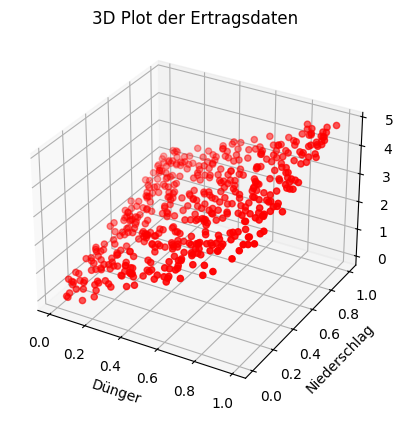

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Dünger'], df['Niederschlag'], df['Ertrag'], c='r', marker='o')
ax.set_xlabel('Dünger')
ax.set_ylabel('Niederschlag')
ax.set_zlabel('Ertrag')
plt.title('3D Plot der Ertragsdaten')
plt.show()

Nutze seaborn, um in p1_regression das paarweise Verhältnis folgender Variablen anzuzeigen. Nutze die Bibliotheken pandas, numpy, matplotlib, mpl_toolkits.mplot3d:

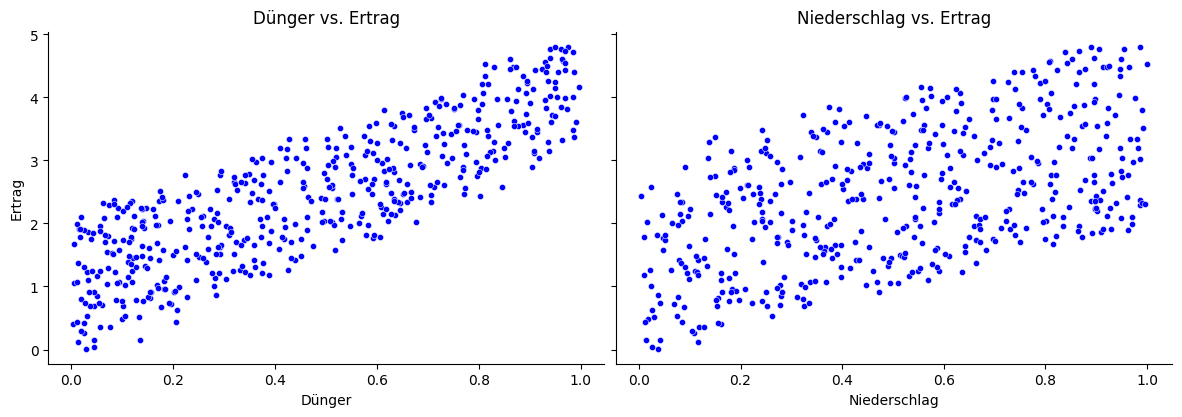

In [12]:
g = sns.pairplot(df, x_vars=['Dünger', 'Niederschlag'], y_vars=['Ertrag'], kind='scatter',
                 plot_kws={'color': 'blue', 's': 20}, height=4, aspect=1.5)

g.axes[0, 0].set_title('Dünger vs. Ertrag')
g.axes[0, 1].set_title('Niederschlag vs. Ertrag')

plt.show()

Randomisiere das Datenset. Teile die Daten in p2_regression in Trainings- und Testdaten (80% Training, 20% Test). Erstelle in Keras ein Modell mit 2 Hidden Layers mit jeweils 4 Knoten und Relu-Aktivierung. Nimm den Mean Squared Error als Loss-Funktion, und den Adam-Optimizer. Trainiere das Modell 100 Epochen lang, mit einer Batch-Größe von 50.

In [17]:
from sklearn.model_selection import train_test_split
# Daten zufällig mischen
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Eingangs- und Ausgangsvariablen definieren
X = df[['Dünger', 'Niederschlag']].values
y = df['Ertrag'].values
# Daten in Trainings- (80%) und Testdaten (20%) aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell mit 2 Hidden Layers
model = Sequential([
    Dense(4, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer + Hidden Layer 1
    Dense(4, activation='relu'),  # Hidden Layer 2
    Dense(1)  # Output Layer
])

# Modell kompilieren
model.compile(optimizer='adam', loss='mse')

# Modell trainieren
model_hist = model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=1, validation_data=(X_test, y_test))



Epoch 1/100


C:\Users\janni\repositories\other\harvest_model\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 5.8443 - val_loss: 5.6554
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4741 - val_loss: 5.4033
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5.4029 - val_loss: 5.1383
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9539 - val_loss: 4.8568
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6857 - val_loss: 4.5664
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.6689 - val_loss: 4.2620
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2606 - val_loss: 3.9443
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.9004 - val_loss: 3.6140
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.5837 - val_loss: 3.2684
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.3046 - val_loss: 2.9212
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.9994 - val_loss: 2.5839
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.1354 - val_loss: 2.2612
Epoch 13/10

Plotte die Loss-Funktionen für Training und Test:

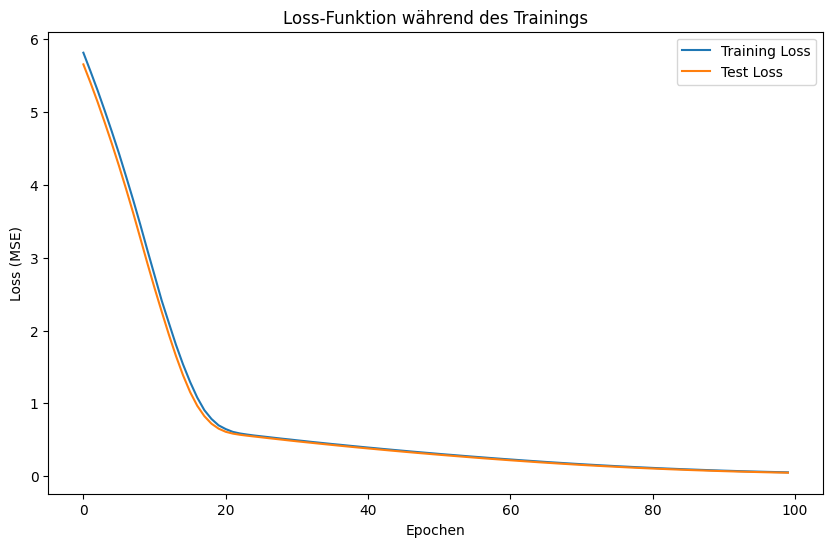

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(model_hist.history['loss'], label='Training Loss')
plt.plot(model_hist.history['val_loss'], label='Test Loss')
plt.xlabel('Epochen')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Loss-Funktion während des Trainings')
plt.show()

Plotte das Modell und die Daten (getrennt nach Test- und Trainingsdaten):

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step


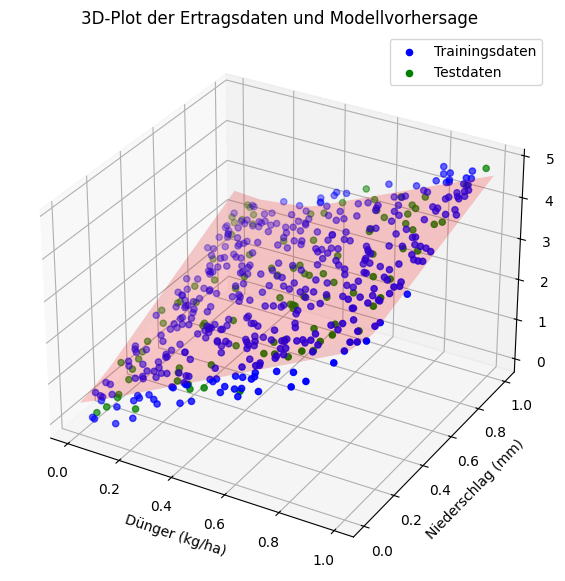

In [26]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training data (blue)
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, color='blue', label='Trainingsdaten')

# Scatter plot for test data (green)
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='green', label='Testdaten')

# Generate a grid for the prediction surface
duenger_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 30)
niederschlag_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 30)
duenger_grid, niederschlag_grid = np.meshgrid(duenger_range, niederschlag_range)
input_grid = np.c_[duenger_grid.ravel(), niederschlag_grid.ravel()]

# Predict Ertrag values using the trained model
ertrag_pred = model.predict(input_grid).reshape(duenger_grid.shape)

# Plot the prediction surface in red
ax.plot_surface(duenger_grid, niederschlag_grid, ertrag_pred, color='red', alpha=0.2)

# Labels and title
ax.set_xlabel('Dünger (kg/ha)')
ax.set_ylabel('Niederschlag (mm)')
ax.set_zlabel('Ertrag')
ax.set_title('3D-Plot der Ertragsdaten und Modellvorhersage')
ax.legend()

plt.show()

Berechne zuletzt die Vorhersagewerte des Modells für folgende Wertepaare:  Niederschlag/Dünger:  [0.25, 0.25], [0.85, 0.75]

In [28]:
# Vorhersagen für die gegebenen Wertepaare
predictions = model.predict(np.array([[0.25, 0.25], [0.85, 0.75]]))
print('Vorhersagen für die Wertepaare [0.25, 0.25] und [0.85, 0.75]:', predictions.flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Vorhersagen für die Wertepaare [0.25, 0.25] und [0.85, 0.75]: [1.4626712 3.8557534]
